Attribute Information:

1.) Area: Gives the number of pixels within the boundaries of the raisin. 
2.) Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3.) MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4.) MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5.) Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins. 
6.) ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7.) Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8.) Class: Kecimen and Besni raisin.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras

data=pd.read_excel('Raisin_Dataset.xlsx')

data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [12]:
#데이터타입 확인
type(data)

pandas.core.frame.DataFrame

In [13]:
#결측치확인
data.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

Text(0.5, 1.0, 'Label')

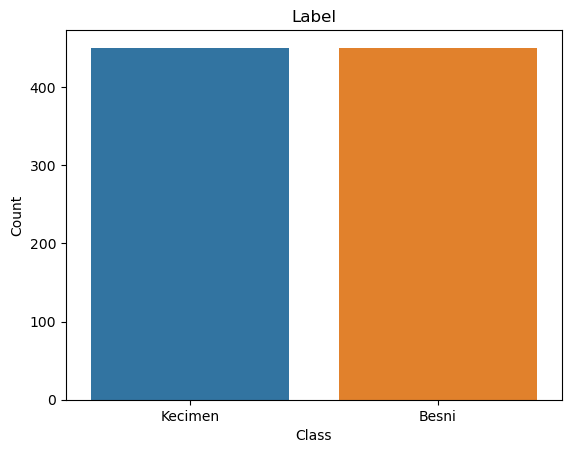

In [14]:
#EDA 수행
sns.countplot(data = data, x="Class")
plt.ylabel("Count")
plt.title("Label")

In [23]:
'''
#데이터 숫자화
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for i in data.columns:

    data[i]=le.fit_transform(data[i])
'''

from tensorflow.python.keras.utils import np_utils

# One-hot encoding of y_train labels (only execute once!)

data["Class"] = np_utils.to_categorical(data["Class"])


data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,551,553,500,558,542,811,544,0.0
1,404,446,409,469,413,299,453,0.0
2,583,554,581,448,571,102,573,0.0
3,74,54,159,108,68,394,66,0.0
4,462,254,709,33,445,890,382,0.0
...,...,...,...,...,...,...,...,...
895,504,512,449,542,492,215,461,1.0
896,549,546,540,508,549,99,577,1.0
897,640,517,739,174,650,722,656,1.0
898,600,633,506,683,600,177,622,1.0


In [25]:
#Splitting the data into training and test test
X = data.iloc[:,0:6].values
y = data.iloc[:,7].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [26]:
X

array([[551, 553, 500, 558, 542, 811],
       [404, 446, 409, 469, 413, 299],
       [583, 554, 581, 448, 571, 102],
       ...,
       [640, 517, 739, 174, 650, 722],
       [600, 633, 506, 683, 600, 177],
       [529, 706, 200, 877, 532,  82]], dtype=int64)

In [27]:
Y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(6,input_shape=(6,),activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(Adam(lr=0.02),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 6)                 42        
                                                                 
 dense_6 (Dense)             (None, 6)                 42        
                                                                 
 dense_7 (Dense)             (None, 2)                 14        
                                                                 
Total params: 140 (560.00 Byte)
Trainable params: 140 (560.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
23/23 [==============================] - 1s 11ms/step - loss: 124.2915 - accuracy: 0.4903 - val_loss: 90.5368 - val_accuracy: 0.5389
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 79.8237 - accuracy: 0.4903 - val_loss: 53.8848 - val_accuracy: 0.5389
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 42.4308 - accuracy: 0.4903 - val_loss: 21.4415 - val_accuracy: 0.5389
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 15.9934 - accuracy: 0.5014 - val_loss: 12.8183 - val_accuracy: 0.4778
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 11.2908 - accuracy: 0.5361 - val_loss: 9.0084 - val_accuracy: 0.6333
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 9.1247 - accuracy: 0.5764 - val_loss: 7.4077 - val_accuracy: 0.6056
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 7.2018 - accuracy: 0.5778 - val_loss: 5.3956 - val_accuracy: 0.6278
Ep

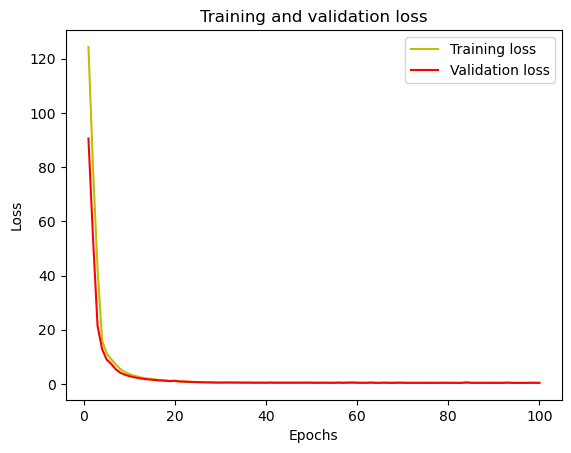

In [32]:
#시각화

import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

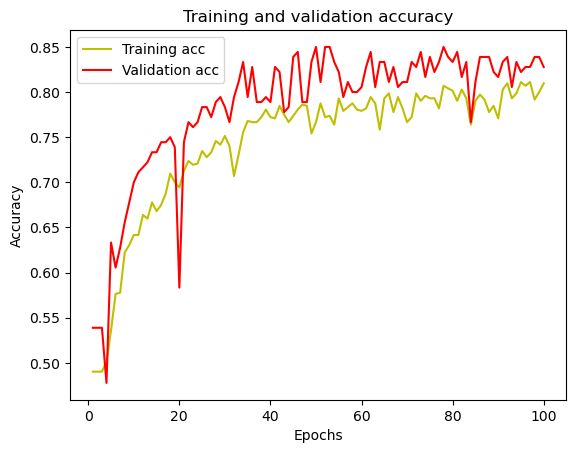

In [33]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [34]:
#성능평가

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80        83
           1       0.81      0.89      0.85        97

    accuracy                           0.83       180
   macro avg       0.83      0.82      0.82       180
weighted avg       0.83      0.83      0.83       180

[[63 20]
 [11 86]]
